# BIRTH RATE ANALYSIS

In [7]:
import pandas as pd
births = pd.read_csv("C:\\Users\\lenovo\\Downloads\\births.csv")

In [13]:
print(births.head())
births['day'].fillna(0, inplace=True)
# Convert the 'day' column to an integer type
births['day'] = births['day'].astype(int)


   year  month  day gender  births
0  1969      1    1      F    4046
1  1969      1    1      M    4440
2  1969      1    2      F    4454
3  1969      1    2      M    4548
4  1969      1    3      F    4548


In [14]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
print(births.head())

   year  month  day gender  births  decade
0  1969      1    1      F    4046    1960
1  1969      1    1      M    4440    1960
2  1969      1    2      F    4454    1960
3  1969      1    2      M    4548    1960
4  1969      1    3      F    4548    1960


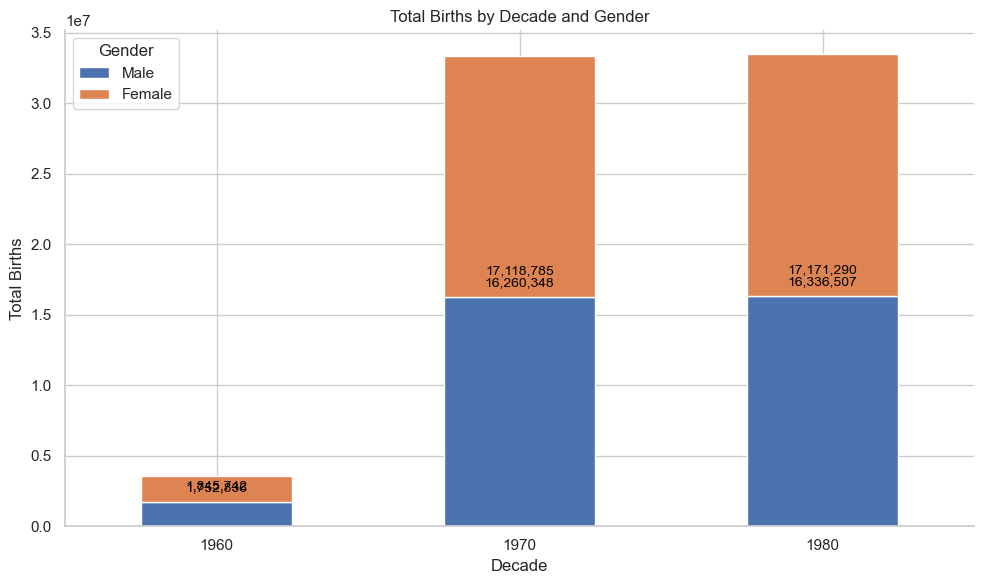

In [36]:
#We immediately see that male births outnumber female births in every decade. To see this trend a bit more clearly
import matplotlib.pyplot as plt
import seaborn as sn
sns.set(style="whitegrid")
birth_decade = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
ax = birth_decade.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Total Births by Decade and Gender")
plt.xlabel("Decade")
plt.ylabel("Total Births")
plt.xticks(rotation=0)
plt.legend(title="Gender", labels=["Male", "Female"], loc="upper left")
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')
sns.despine()
plt.tight_layout()
plt.show()


In [16]:
import numpy as np
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [33]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['day of week'] = births.index.dayofweek

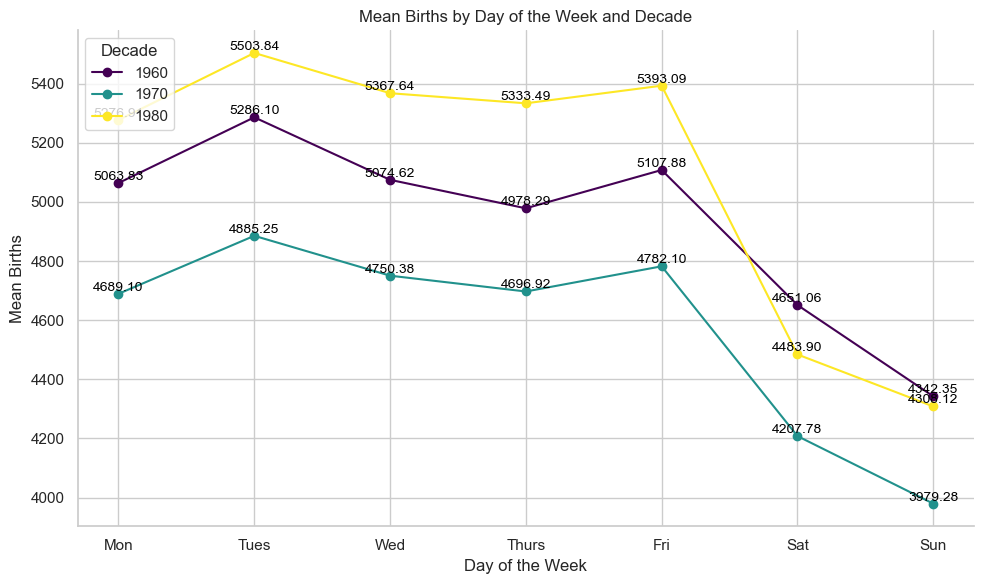

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pivot_table = births.pivot_table('births', index='day of week', columns='decade', aggfunc='mean')

sns.set(style="whitegrid")

ax = pivot_table.plot(figsize=(10, 6), cmap="viridis", marker="o")

plt.title("Mean Births by Day of the Week and Decade")
plt.xlabel("Day of the Week")
plt.ylabel("Mean Births")
plt.xticks(range(len(custom_labels)), custom_labels)


plt.legend(title="Decade", loc="upper left")

for column in pivot_table.columns:
    for i, value in enumerate(pivot_table[column]):
        ax.annotate(f'{value:.2f}', (i, value), ha='center', va='bottom', fontsize=10, color='black')

sns.despine()

plt.tight_layout()
plt.show()


In [24]:
#Apparently births are slightly less common on weekends than on weekdays! Note that the 1990s and 2000s are missing because the CDC data contains only the month of birth starting in 1989.
#Another interesting view is to plot the mean number of births by the day of the year. Let’s first group the data by month and day separately:

In [35]:
from datetime import datetime  
births_month = births.pivot_table('births', [births.index.month, births.index.day])
print(births_month.head())
births_month.index = [datetime(2012, month, day) for (month, day) in births_month.index]
print(births_month.head())


       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


In [26]:
#Focusing on the month and day only, we now have a time series reflecting the average number of births by date of the year. From this, we can use the plot method to plot the data. It reveals some interesting trends:

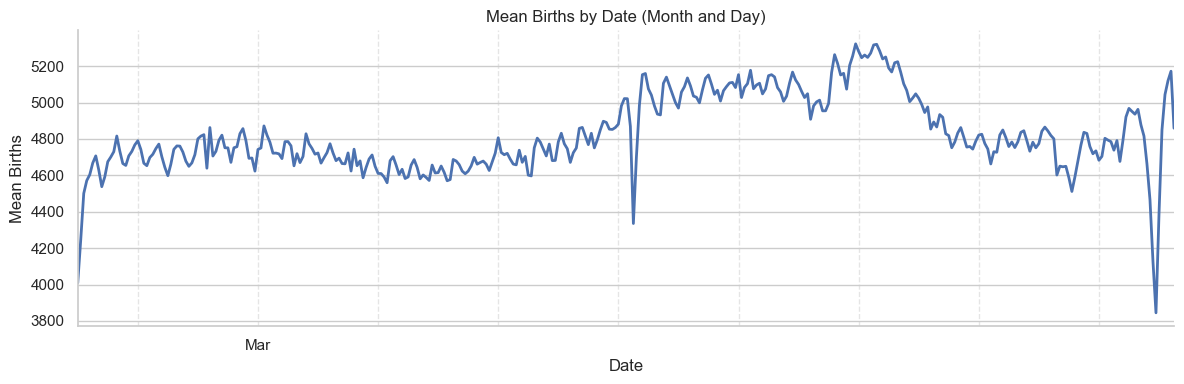

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax, legend=False, lw=2)

plt.title("Mean Births by Date (Month and Day)")
plt.xlabel("Date")
plt.ylabel("Mean Births")

ax.xaxis.set_major_locator(plt.MaxNLocator(10)) 
ax.xaxis.grid(True, linestyle='--', alpha=0.5)


sns.despine()

plt.tight_layout()
plt.show()
